![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data using `SMOTE`.
- Note that since `SMOTE` works on numerical data only, we will first encode the categorical variables in this case.

In [1]:
# Prepare toolbox

import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
import glob
path = "./files_for_lab/*.csv"
data_list=[pd.read_csv(fname) for fname in glob.glob(path)]
df=pd.concat(data_list, axis=1)

In [3]:
df

STATE  CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2  \
0         IL       36        H      F         3      L      E        C   
1         CA       14        H      M         3      L      G        A   
2         NC       43        U      M         3      L      E        C   
3         CA       44        U      F         3      L      E        C   
4         FL       16        H      F         3      L      F        A   
...      ...      ...      ...    ...       ...    ...    ...      ...   
95407  other       27        H      M         3      L      G        C   
95408     TX       24        H      M         3      L      F        A   
95409     MI       30        H      M         3      L      E        B   
95410     CA       24        H      F         2      L      F        A   
95411     NC       24        U      F         3      L      G        C   

      DOMAIN_A  DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  \
0            T         2         89          1      37      12           92   
1            S         1         94          1      52       2           93   
2            R         2         90          1       0       2           91   
3            R         2         87          1      28       1           87   
4            S         2         86          1      20       1           93   
...        ...       ...        ...        ...     ...     ...          ...   
95407        C         2         96          1       0       2           96   
95408        C         1         96          1      50       1           96   
95409        C         3         95          1      38       1           96   
95410        C         1         86          1      40       5           90   
95411        C         1         88          1      18       1           88   

       MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  \
0                8           94            2           95           12   
1               10           95           12           95           12   
2               11           92            7           95           12   
3               11           94           11           95           12   
4               10           96            1           96            1   
...            ...          ...          ...          ...          ...   
95407            2           96            2           96            2   
95408            3           96            3           96            3   
95409            3           95            1           96           10   
95410           11           96            8           97            1   
95411           12           93           12           96           12   

       FIRSTDATE_YR  FIRSTDATE_MM  TCODE        AGE  INCOME  WEALTH1  HIT  \
0                89            11      0  60.000000       5        9    0   
1                93            10      1  46.000000       6        9   16   
2                90             1      1  61.611649       3        1    2   
3                87             2      0  70.000000       1        4    2   
4                79             3      0  78.000000       3        2   60   
...             ...           ...    ...        ...     ...      ...  ...   
95407            96             2      1  61.611649       5        9    0   
95408            96             3      1  48.000000       7        9    1   
95409            94            10      1  60.000000       5        9    0   
95410            86            12      0  58.000000       7        9    0   
95411            88             3      2  80.000000       5        8    3   

       MALEMILI  MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  \
0             0       39        34        18        10         2       1   
1             0       15        55        11         6         2       1   
2             0       20        29        33         6         8       1   
3             0       23        14        31       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 339 entries, STATE to TARGET_D
dtypes: float64(10), int64(322), object(7)
memory usage: 246.8+ MB


In [5]:
data_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         95412 non-null  object
 1   CLUSTER       95412 non-null  int64 
 2   HOMEOWNR      95412 non-null  object
 3   GENDER        95412 non-null  object
 4   DATASRCE      95412 non-null  int64 
 5   RFA_2R        95412 non-null  object
 6   RFA_2A        95412 non-null  object
 7   GEOCODE2      95412 non-null  object
 8   DOMAIN_A      95412 non-null  object
 9   DOMAIN_B      95412 non-null  int64 
 10  ODATEW_YR     95412 non-null  int64 
 11  ODATEW_MM     95412 non-null  int64 
 12  DOB_YR        95412 non-null  int64 
 13  DOB_MM        95412 non-null  int64 
 14  MINRDATE_YR   95412 non-null  int64 
 15  MINRDATE_MM   95412 non-null  int64 
 16  MAXRDATE_YR   95412 non-null  int64 
 17  MAXRDATE_MM   95412 non-null  int64 
 18  LASTDATE_YR   95412 non-null  int64 
 19  LAST

In [6]:
data_list[0]['DOMAIN_B'].unique() #DOMAIN_B is categorical although it apears as int64

array([2, 1, 3, 4])

In [7]:
#pd.DataFrame(data_list[0]['CLUSTER']).value_counts() 
#CLUSTER is discrete numerical. It's a category, but it cannot be encoded.

In [8]:
categoricals=data_list[0]
date_features=categoricals.columns[10:]
date_features.to_list()
#date_features

['ODATEW_YR',
 'ODATEW_MM',
 'DOB_YR',
 'DOB_MM',
 'MINRDATE_YR',
 'MINRDATE_MM',
 'MAXRDATE_YR',
 'MAXRDATE_MM',
 'LASTDATE_YR',
 'LASTDATE_MM',
 'FIRSTDATE_YR',
 'FIRSTDATE_MM']

In [9]:
categoricals[date_features]

ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  MINRDATE_MM  \
0             89          1      37      12           92            8   
1             94          1      52       2           93           10   
2             90          1       0       2           91           11   
3             87          1      28       1           87           11   
4             86          1      20       1           93           10   
...          ...        ...     ...     ...          ...          ...   
95407         96          1       0       2           96            2   
95408         96          1      50       1           96            3   
95409         95          1      38       1           96            3   
95410         86          1      40       5           90           11   
95411         88          1      18       1           88           12   

       MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  FIRSTDATE_YR  \
0               94            2           95           12            89   
1               95           12           95           12            93   
2               92            7           95           12            90   
3               94           11           95           12            87   
4               96            1           96            1            79   
...            ...          ...          ...          ...           ...   
95407           96            2           96            2            96   
95408           96            3           96            3            96   
95409           95            1           96           10            94   
95410           96            8           97            1            86   
95411           93           12           96           12            88   

       FIRSTDATE_MM  
0                11  
1                10  
2                 1  
3                 2  
4                 3  
...             ...  
95407             2  
95408             3  
95409            10  
95410            12  
95411             3  

[95412 rows x 12 columns]

In [10]:
#Decided to leave the date features as they are, since they are already split in month and year
#Will encode the rest of features

### Encoding categorical, non-numerical features

In [11]:
categorical_features=categoricals.columns.tolist()[:9] #Will concat DOMAIN_B
categorical_features.pop(1) #Will concat CLUSTER
categorical_features_df=categoricals[categorical_features]

In [12]:
# One Hot Encoding categorical variables

encoder = OneHotEncoder(handle_unknown='error', drop='first') #drop one column for efficiency. It can be deduced
categorical_features_encoded = encoder.fit_transform(categorical_features_df).toarray()
categorical_features_encoded

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
column_names = ['CLUSTER','DOMAIN_B']
column_names.extend(date_features.to_list()) # get list of dates column names

categoricals_date_others=categoricals[column_names]
categoricals_date_others

CLUSTER  DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  \
0           36         2         89          1      37      12           92   
1           14         1         94          1      52       2           93   
2           43         2         90          1       0       2           91   
3           44         2         87          1      28       1           87   
4           16         2         86          1      20       1           93   
...        ...       ...        ...        ...     ...     ...          ...   
95407       27         2         96          1       0       2           96   
95408       24         1         96          1      50       1           96   
95409       30         3         95          1      38       1           96   
95410       24         1         86          1      40       5           90   
95411       24         1         88          1      18       1           88   

       MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  \
0                8           94            2           95           12   
1               10           95           12           95           12   
2               11           92            7           95           12   
3               11           94           11           95           12   
4               10           96            1           96            1   
...            ...          ...          ...          ...          ...   
95407            2           96            2           96            2   
95408            3           96            3           96            3   
95409            3           95            1           96           10   
95410           11           96            8           97            1   
95411           12           93           12           96           12   

       FIRSTDATE_YR  FIRSTDATE_MM  
0                89            11  
1                93            10  
2                90             1  
3                87             2  
4                79             3  
...             ...           ...  
95407            96             2  
95408            96             3  
95409            94            10  
95410            86            12  
95411            88             3  

[95412 rows x 14 columns]

In [14]:
column_names.extend(list(encoder.get_feature_names())) # add list of dummified categorical column names
#column_names
categories_ready_array = np.concatenate([categoricals_date_others, categorical_features_encoded], axis=1)
categories_ready_df = pd.DataFrame(data=categories_ready_array, columns=column_names)
categories_ready_df.sample(5)

CLUSTER  DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  \
24582     42.0       1.0       86.0        1.0    20.0     1.0         87.0   
58272     26.0       2.0       94.0        1.0     0.0     2.0         94.0   
24319     39.0       2.0       89.0        1.0    46.0     1.0         89.0   
82149     42.0       1.0       86.0        1.0     0.0     2.0         88.0   
74502     39.0       2.0       92.0        1.0    41.0     1.0         92.0   

       MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  \
24582          3.0         93.0         12.0         96.0         11.0   
58272          1.0         95.0         12.0         95.0         12.0   
24319          9.0         96.0          3.0         96.0          3.0   
82149          8.0         95.0          9.0         95.0          9.0   
74502          3.0         94.0          8.0         96.0          1.0   

       FIRSTDATE_YR  FIRSTDATE_MM  x0_FL  x0_GA  x0_IL  x0_IN  x0_MI  x0_MO  \
24582          87.0           3.0    0.0    0.0    0.0    0.0    0.0    0.0   
58272          94.0           1.0    0.0    0.0    0.0    1.0    0.0    0.0   
24319          89.0           9.0    0.0    0.0    0.0    0.0    0.0    0.0   
82149          87.0           5.0    0.0    0.0    0.0    0.0    0.0    0.0   
74502          92.0           3.0    0.0    0.0    0.0    0.0    0.0    0.0   

       x0_NC  x0_TX  x0_WA  x0_WI  x0_other  x1_U  x2_M  x2_other  x3_2  x3_3  \
24582    0.0    1.0    0.0    0.0       0.0   1.0   0.0       0.0   0.0   1.0   
58272    0.0    0.0    0.0    0.0       0.0   0.0   0.0       0.0   0.0   1.0   
24319    1.0    0.0    0.0    0.0       0.0   0.0   0.0       0.0   0.0   1.0   
82149    0.0    0.0    0.0    0.0       1.0   0.0   0.0       0.0   0.0   1.0   
74502    1.0    0.0    0.0    0.0       0.0   0.0   0.0       0.0   0.0   1.0   

       x5_E  x5_F  x5_G  x6_B  x6_C  x6_D  x7_R  x7_S  x7_T  x7_U  
24582   0.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0  
58272   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
24319   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0  
82149   0.0   1.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0  
74502   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0

### Normalize numerical features

In [15]:
numericals=data_list[1]
target_B=pd.DataFrame(data_list[2]['TARGET_B'])#, columns='TARGET_B')
numericals_df=pd.concat([numericals,target_B], axis=1)

In [16]:
transformer = Normalizer().fit(numericals_df)
numericals_norm_array=transformer.transform(numericals_df)
numericals_norm=pd.DataFrame(data=numericals_norm_array,columns=numericals_df.columns)
#numericals_norm

In [17]:
print(numericals_norm.dtypes.value_counts())
categories_ready_df.dtypes.value_counts()
#numericals_norm.info()

float64    316
dtype: int64


float64    40
dtype: int64

### SMOTE upsampling

In [23]:
pd.DataFrame(data_list[2])

TARGET_B  TARGET_D
0             0       0.0
1             0       0.0
2             0       0.0
3             0       0.0
4             0       0.0
...         ...       ...
95407         0       0.0
95408         0       0.0
95409         0       0.0
95410         1      18.0
95411         0       0.0

[95412 rows x 2 columns]

In [32]:
pd.DataFrame(data_list[2])['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [24]:
X=pd.concat([numericals_norm,categories_ready_df], axis=1)
y=pd.DataFrame(data_list[2]['TARGET_B'])

In [25]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   TARGET_B  95412 non-null  int64
dtypes: int64(1)
memory usage: 745.5 KB


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

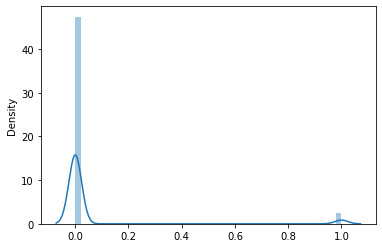

In [27]:
ax=sns.distplot(y_train)

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)  #X_train and y_train after SMOTE
#ax=sns.distplot(y_train_sm)

In [29]:
classification=RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_sm, y_train_sm)

LOGISTIC REGRESSION RESULTS
Score = 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27200
           1       1.00      0.99      0.99      1424

    accuracy                           1.00     28624
   macro avg       1.00      0.99      1.00     28624
weighted avg       1.00      1.00      1.00     28624



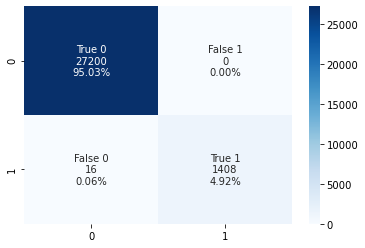

In [33]:
#Score and predictions
print("LOGISTIC REGRESSION RESULTS")
print("Score =",round(classification.score(X_test, y_test), 3))
predictions = classification.predict(X_test)
#display(pd.Series(predictions).value_counts())
#display(y_test.value_counts())

#Confusion matrices
confusion_matrix(y_test, predictions)
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True 0', 'False 1', 'False 0', 'True 1']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
#plot_confusion_matrix(classification_LogRes, X_test, y_test, cmap='Blues')
#plt.show()
print(classification_report(y_test, predictions))